## Imports

In [1]:
from utils import *

In [2]:
raw_df = pd.read_csv('data/dataset_SCL.csv')

C:\Users\Federico Young\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
raw_df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


El dataset contiene 68206 datos que corresponde a vuelos del aeropuerto de Santiago.
Vamos a crear una funcion (Tweak function) para realizar las siguientes modificaciones:
- Reemplazar en todas las columnas '-' con un '_'
- Asignarle a Fecha_I y Fecha_O variables de tipo datetime
- Convertir Dia, Mes y Año a variables categoricas

Solo la variable Vlo_O (Numero de operacion de vuelo) tiene un valor nulo.

## Tweak features

Vamos a realizar algunas conversiones iniciales.

Para ello, creamos una funcion "tweak function" y usamos el metodo .assign para realizar las transformaciones en cadena

In [5]:
def tweak_function(df: pd.DataFrame):
    """Algunos ajustes iniciales al dataset"""
    return (df
            .rename(columns = lambda c: c.replace('-','_'))
            .assign(Fecha_I =  pd.to_datetime(df['Fecha-I']),
                    Fecha_O = pd.to_datetime(df['Fecha-O']),
                    DIA= df['DIA'].astype('str'),
                    MES = df['MES'].astype('str'),
                    AÑO = df['AÑO'].astype('str')
                   )
           )


In [6]:
df = tweak_function(raw_df)

## Analisis inicial

### Fecha y Origen de vuelo programado

In [160]:
df.Fecha_I.dt.year.value_counts()

2017    68206
Name: Fecha_I, dtype: int64

In [88]:
df.Ori_I.value_counts()

SCEL    68206
Name: Ori_I, dtype: int64

Son todos vuelos de 2017 y que salen de Santiago.

Por lo que si planteamos el problema de forma mas especifica, el objetivo es predecir atrasos en vuelos que parten de Santiago

### Variables planificadas (o programadas) vs variables de operacion

In [7]:
print(f'Cantidad de vuelos cuyo numero de vuelo fue cambiado: {len(df[~(df.Vlo_I == df.Vlo_O)])/len(df)*100:.3} %')     

Cantidad de vuelos cuyo numero de vuelo fue cambiado: 2.71 %


En un futuro se podrian agregar mas variables para identificar alguna relacion entre todos los vuelos que han cambiado de numero. Podriamos plantear como hipotesis que estos vuelos pueden haber tenido un accidente o un incidente serio y por ello la compania decide cambiar el numero de vuelo. Si esta hipotesis es correcta, no estariamos en condiciones de decir que el cambio de numero de vuelo podria causar una alta tasa de atraso.

In [8]:
print(f'Cantidad de vuelos cuya ciudad de origen fue cambiada: {len(df[~(df.Ori_I == df.Ori_O)])/len(df)*100:.3} %') 

Cantidad de vuelos cuya ciudad de origen fue cambiada: 0.0 %


Confirmamos que todos los vuelos planificados para partir de Santiago, efectivamente salieron de Santiago

In [10]:
print(f'Cantidad de vuelos cuya ciudad de destino fue cambiada: {len(df[~(df.Des_I == df.Des_O)])/len(df)*100:.1} %') 

Cantidad de vuelos cuya ciudad de destino fue cambiada: 0.04 %


In [11]:
print(f'Cantidad de vuelos cuya aerolinea fue cambiada: {len(df[~(df.Emp_I == df.Emp_O)])/len(df)*100:.4} %') 

Cantidad de vuelos cuya aerolinea fue cambiada: 27.37 %


Este último dato es interesante. Podriamos proponer como hipótesis que estos vuelos, cuya aerolina planificada para operarlos fue distinta a la que efectivamente opero, podrian tener una alta tasa de atraso.

No lo usaremos para modelar, dado que se trata de un problema de prediccion por lo que no podemos contar con datos reales de operacion de los vuelos, pero es una hipotesis que podemos plantear.

## Generacion de variables adicionales

### temporada_alta

: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

In [12]:
temporada_alta = (
    (df.Fecha_I.dt.date >= datetime.date(2017, 12, 15)
    ) | 
    (df.Fecha_I.dt.date <= datetime.date(2017, 3, 3)
    ) | 
    ((df.Fecha_I.dt.date >= datetime.date(2017, 7, 15)) & 
     (df.Fecha_I.dt.date <= datetime.date(2017, 7, 31))
    ) | 
    ((df.Fecha_I.dt.date >= datetime.date(2017, 9, 11)) & 
     (df.Fecha_I.dt.date <= datetime.date(2017, 9, 30))
    )
)

In [13]:
df['temporada_alta'] = temporada_alta * 1

In [14]:
df['temporada_alta'].value_counts()/len(df)*100

0    66.627569
1    33.372431
Name: temporada_alta, dtype: float64

Si miramos la variable temporada alta, vemos en total aproximadamente 4 meses: 
- Enero
- Febrero
- 57 dias distribuidos: 17 dias de Diciembre, 3 dias de Marzo, 17 dias en Julio y 20 dias en Septiembre

Por lo que la cantidad vuelos en temporada alta (~ 33 %) hace suponer que tenemos una distribucion aproximadamente equitativa de cantidad de vuelos por mes.

### Diferencia en minutos

In [15]:
df['dif_min'] = ((df.Fecha_O-df.Fecha_I)
                 .astype('timedelta64[m]')
                )

<AxesSubplot:>

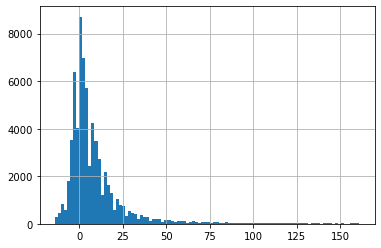

In [16]:
df['dif_min'].hist(bins=100)

In [219]:
df['dif_min'].median()

4.0

De todos los vuelos que tenemos disponibles del 2017, vemos que la mediana es 4 min.

A partir de esta variable, vamos a construir nuestra variable objetivo.

### Variable objetivo: atraso_15

In [20]:
n=15

In [21]:
df['atraso_15'] = (df['dif_min'] > n)*1

In [22]:
df['atraso_15'].value_counts() / len(df) *  100

0    81.506026
1    18.493974
Name: atraso_15, dtype: float64

Si seteamos un threshold de 15 min para determinar cuando un vuelo se considera con atraso o no, vemos que nuestra variable objetivo no esta desbalanceada (~ 1 de cada 5 vuelos se atraso).

En la seccion de EDA vamos a profundizar en el analisis de cada variable por tasa de atraso.

### periodo_dia 

 mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

In [23]:
def periodo_del_dia(x):
    if (x >= datetime.time(5, 0)) & (x <= datetime.time(11, 59)): 
        return 'mañana'
    elif (x >= datetime.time(12, 0)) & (x <= datetime.time(18, 59)):
        return 'tarde'
    return 'noche'

In [24]:
df['periodo_dia'] = (df['Fecha_I']
                     .dt
                     .time
                     .apply(periodo_del_dia)
                    )

### Create synthetic_features.csv

Luego de haber generado estas 4 features, creamos el dataset Synthetic_features.csv tal como lo pide la letra.

In [18]:
df.to_csv('synthetic_features.csv',
          columns= ['temporada_alta',
                   'dif_min',
                   'atraso_15',
                   'periodo_dia'
                   ],
          index=False
         )

In [19]:
synthetic_features = pd.read_csv('synthetic_features.csv')
synthetic_features.head()

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3.0,0,noche
1,1,9.0,0,noche
2,1,9.0,0,noche
3,1,3.0,0,noche
4,1,-2.0,0,noche


### Cantidad de vuelos por hora

Vamos a crear una variable que considere la cantidad de vuelos en el mismo momento.

Apriori, seria una variable interesante que podria tener un alto poder predictivo si queremos predecir los atrasos.

In [25]:
df = (df.assign(cantidad_vuelos_hora = (df
                                        .groupby(['Fecha_I'])['Fecha_I']
                                        .transform('count')
                                        .apply(str)
                                       )
               )
     )

### Semana del año

Vamos a crear otra variable que sea la semana del año.

En un principio podriamos plantear la hipotesis de que hay algunas semanas congestionadas con gran flujo de pasajeros que aumenten la tasa de atraso. La semana entre las fiestas, semanas de vacaciones de invierno, semana santa, etc etc.


In [26]:
df['Semana_del_año'] =  (df.Fecha_I
                         .dt
                         .isocalendar()
                         .week
                         .astype(int)
                         .apply(str)
                        )

## EDA: Exploratory Data Analysis

Vamos a utilizar el Weight of Evidence (WoE) y el Information Value (IV) para realizar un analisis preliminar de la correlacion entre cada una de las variables y la variable target.

El IV es principalmente muy util para seleccionar variables en modelos con relaciones lineales (como Regresion Logistica). Cabe destacar que si bien el valor de IV puede ser un indicador del poder predictivo de cada variable, para modelos que detectan relaciones no lineales (como Random Forest, AdaBoost, XGBoost) se puede perder informacion si elimnamos variables segun el criterio que nos determina el IV 

Para predecir nuestra variable objetivo, estos son los rangos para la fuerza predictora de la variable en base al estadistico IV:
- IV < 0.02 -->       Useless variable
- 0.02 < IV < 0.1 --> Weak variable
- 0.1 < IV < 0.3 --> Medium variable
- 0.3 < IV < 0.5 --> Strong variable
- IV > 0.5 -->       Sospechosa de ser muy buena. Revisar

### Destino

C:\Users\Federico Young\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


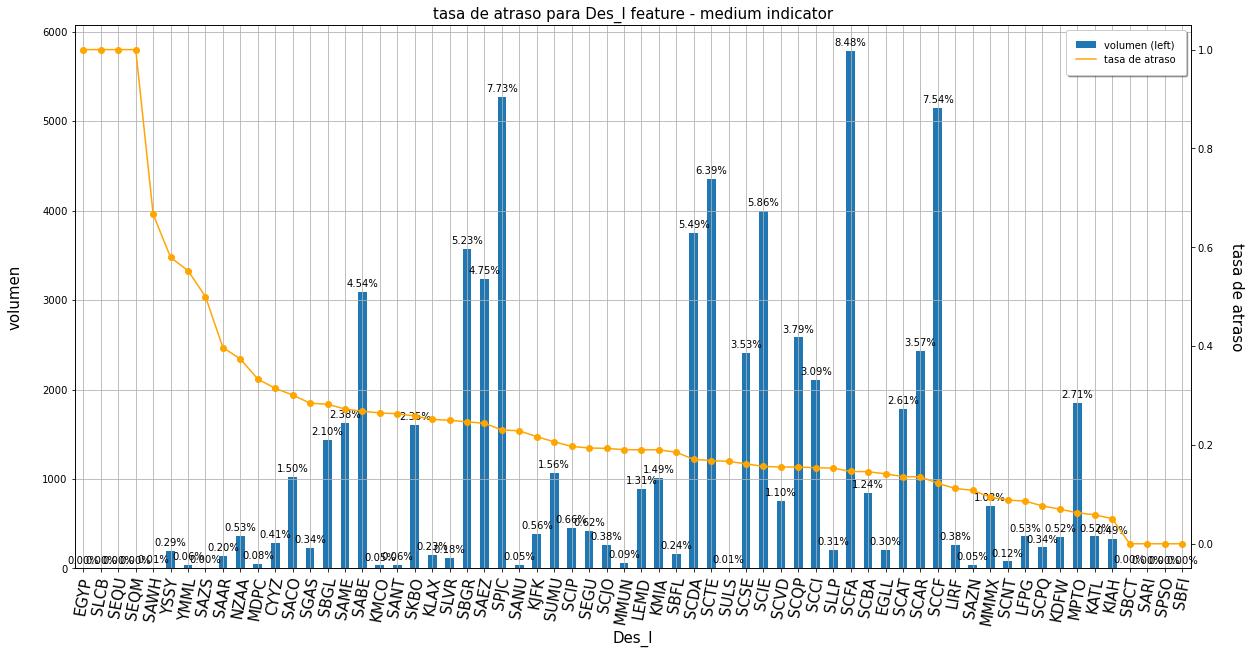

In [29]:
iv_df_Des_I , iv = data_vars(df[['Des_I']],df['atraso_15'])
plot_bivariant(iv_df_Des_I, 'Des_I', 'Des_I')

In [230]:
df.Des_I.value_counts().tail(10)

SULS    6
SBCT    3
SAZS    2
EGYP    1
SLCB    1
SPSO    1
SBFI    1
SARI    1
SEQM    1
SEQU    1
Name: Des_I, dtype: int64

Tasa de atraso por destino.
Vemos en cada uno de los extremos de la grafica destinos con tasa de atraso 1 y tasa de atraso 0.
Si vemos en el value_counts() de arriba, son destinos con muy pocos vuelos, en su mayoria incluso se cuenta con un registro solo de vuelo.

Tenemos una alta cardinalidad, buscaremos agrupar los destinos por segmentos.
Para esto, usaremos el estadistico de los cuantiles. Particularmente, discretizaremos los destinos en decilos en funcion de la tasa de atraso.

In [34]:
# con la qcut divimos los datos en segmentos igual, en este caso en deciles porque asignamos q=10
iv_df_Des_I['decile_destino'], bins = pd.qcut(iv_df_Des_I['EVENT_RATE'], 
                                              q=10, 
                                              retbins=True, 
                                              labels = False
                                             )

In [35]:
# Para que los decilos sean de 1 a 10
iv_df_Des_I['decile_destino'] += 1

In [36]:
#Creamos un diccionario en el cual mapeamos cada destino con el decilo que le corresponde
dict_ = {}
for destino in iv_df_Des_I['MIN_VALUE']:
    dict_[destino] = iv_df_Des_I[iv_df_Des_I['MIN_VALUE'] == destino]['decile_destino'].values

In [37]:
#Creamos una nueva variable donde se asigna a cada observacion el decilo que le corresponde en funcion del destino
df['decile_destino'] = df['Des_I'].map(dict_).str[0].astype('str')

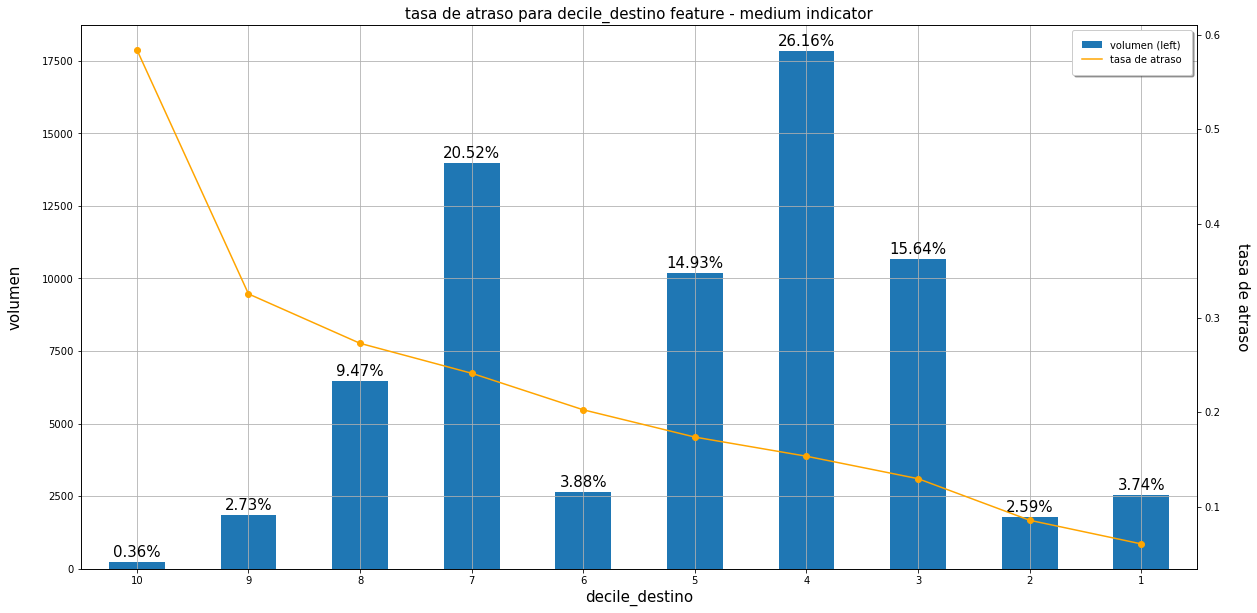

In [38]:
iv_df , iv = data_vars(df[['decile_destino']],df['atraso_15'])
plot_bivariant(iv_df, 'decile_destino', 'decile_destino')

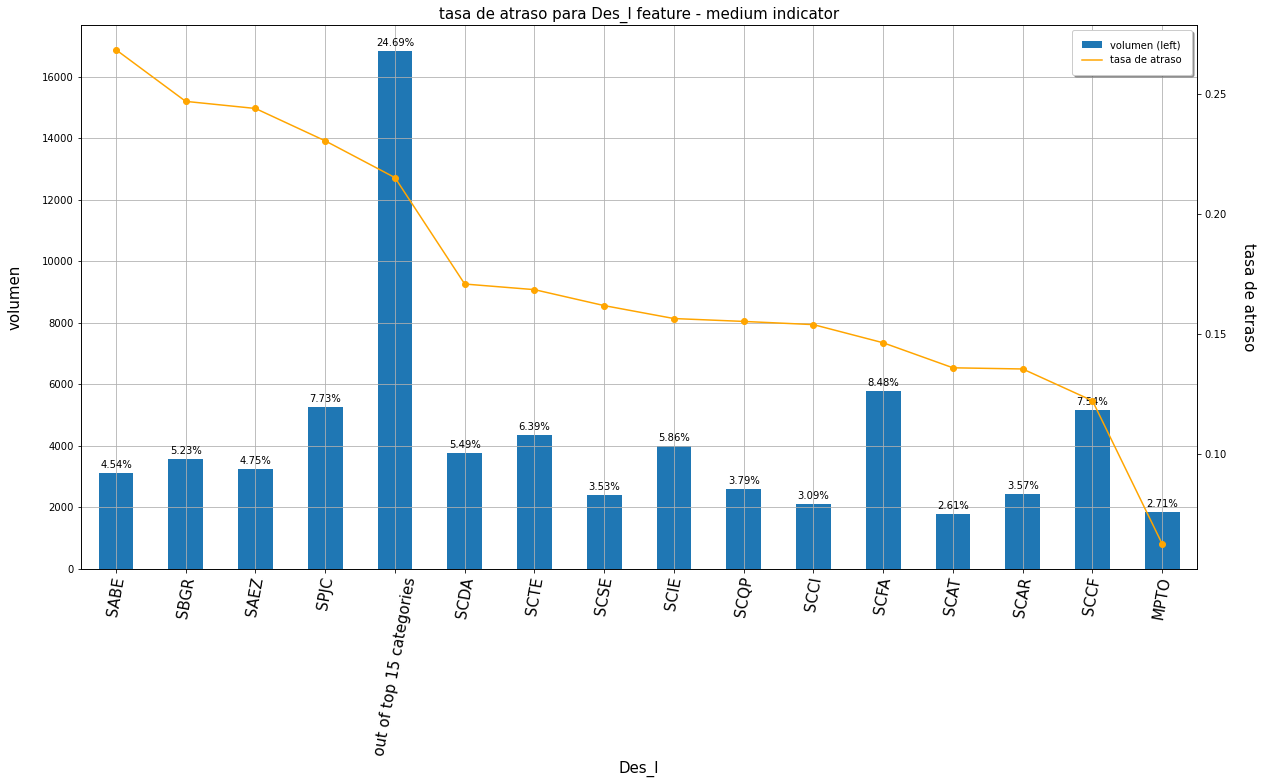

In [101]:
df = group_top_x_amount_of_categories(df, 'Des_I', 15)
iv_df , iv = data_vars(df[['Des_I']],df['atraso_15'])
plot_bivariant(iv_df, 'Des_I', 'Des_I')

### Aerolinea

In [39]:
len(df.Emp_I.unique())

30

Tenemos datos de 30 aerolineas

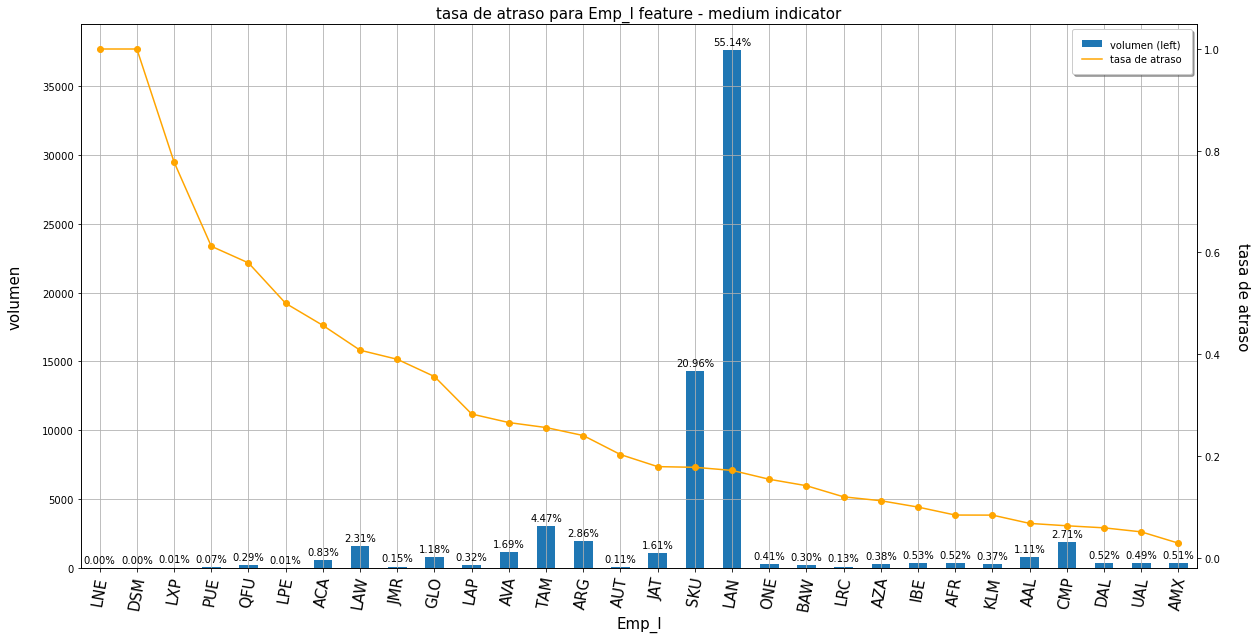

In [23]:
iv_df , iv = data_vars(df[['Emp_I']],df['atraso_15'])
plot_bivariant(iv_df, 'Emp_I', 'Emp_I')

En lo que respecta a la distribucion de los vuelos por aerolinea, vemos que LAN y SKU se llevan el 75% de los vuelos. Es decir, entre las otras 28 aerolineas se reparten el 25% de los vuelos.
Vamos a reducir la cardinalidad seleccionando las 10 aerolineas con mas vuelos, y dejando el resto bajo el valor: 'Out of top 10 categories'

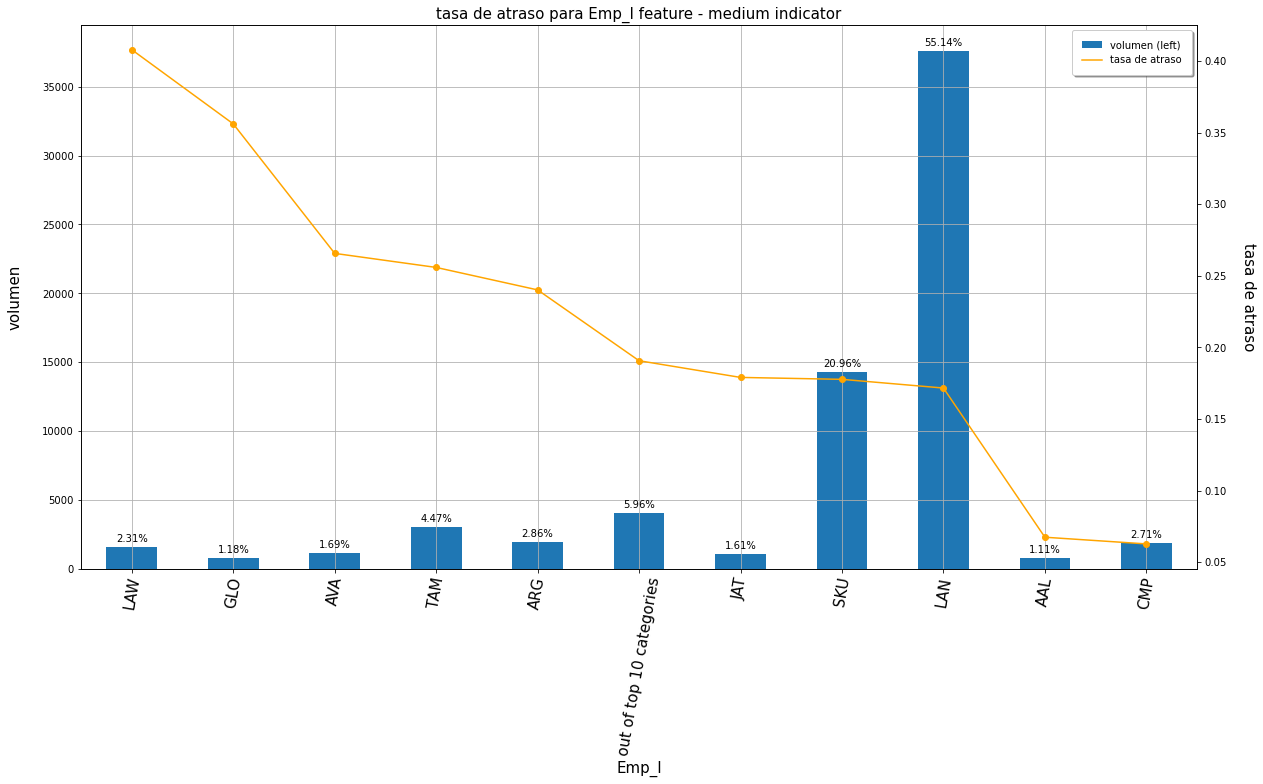

In [244]:
df = group_top_x_amount_of_categories(df, 'Emp_I', 10)
iv_df , iv = data_vars(df[['Emp_I']],df['atraso_15'])
plot_bivariant(iv_df, 'Emp_I', 'Emp_I')

Con esta estrategia capturamos aproximadamente el 94% de los vuelos entre las top 10 aerolineas. Nos quedo el 6% agrupadas afuera del Top de 10 de Aerolineas

### Mes del año

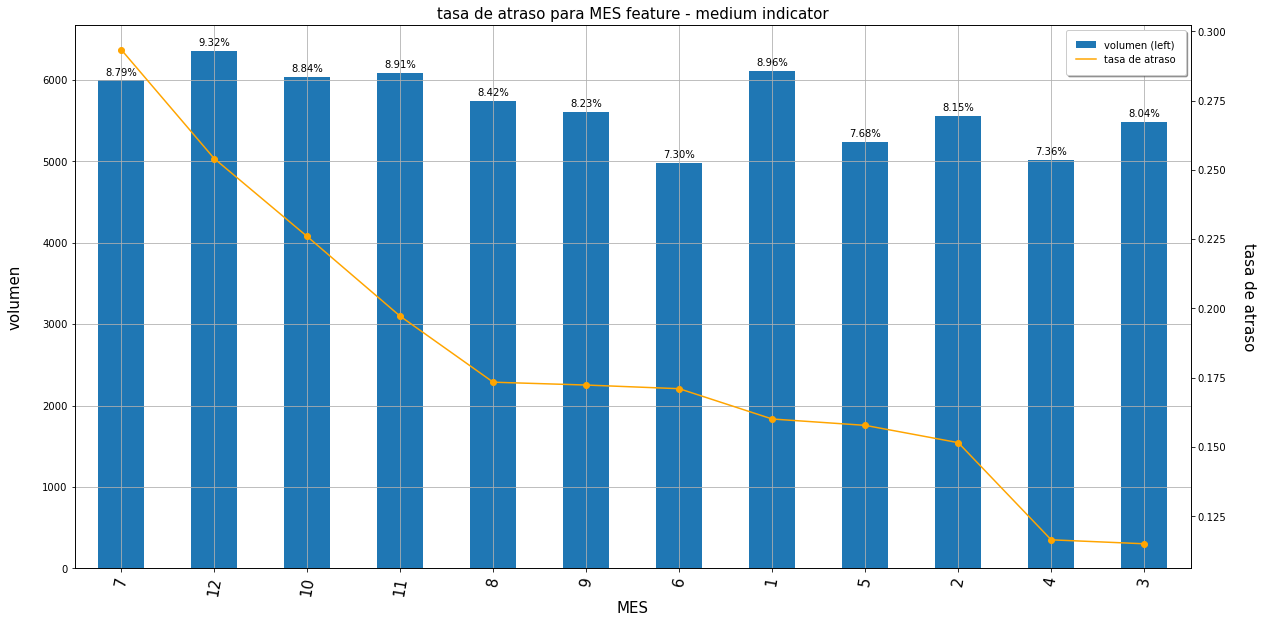

In [40]:
iv_df , iv = data_vars(df[['MES']],df['atraso_15']) 
plot_bivariant(iv_df, 'MES', 'MES')

En la tasa de atraso por mes del año podemos ver algunas conslusiones interesantes.

Respecto a la distribucion de los datos, vemos que se reparten equitativamente, por lo que cada mes tiene un volumen importante de vuelos.

Respecto a la tasa de atraso, podemos ver que hay algunos meses con tasas muy bajas (Marzo y Abril), y a Julio y Diciembre con las tasas de atraso mas altas. Considerando que son meses de temporada alta, podriamos plantear la hipotesis de que son los meses con mayor flujo de pasajeros.

Podria ser interesante contar con la cantidad de pasajeros por vuelo, o el flujo de pasajeros por mes en el aeropuerto, para utilizar como variable predictora para este objetivo.

### Dia de la semana

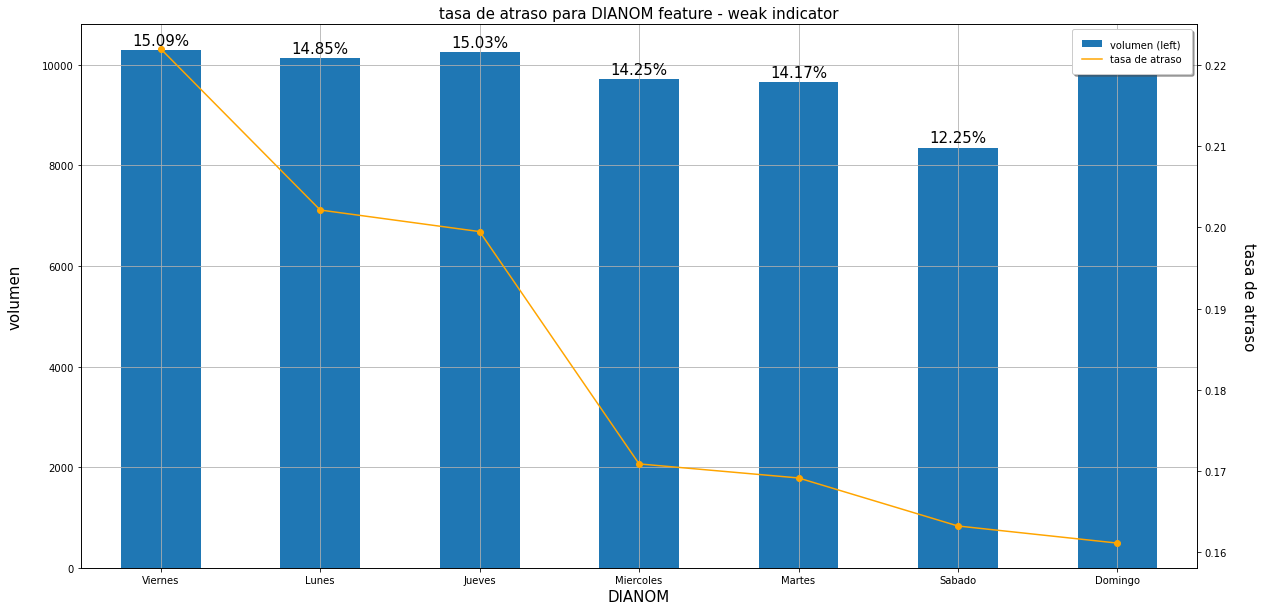

In [26]:
iv_df , iv = data_vars(df[['DIANOM']],df['atraso_15']) 
plot_bivariant(iv_df, 'DIANOM', 'DIANOM')

Aqui tambien vemos un volumen similar de cantidad de vuelos por dia de la semana (a excepcion de los sabados donde se ve una leve disminucion).

Podemos identificar un par de conclusiones interesantes en la tasa de atraso por dia de semana:
1. Los inicios y fines de cada semana laboral (lunes y viernes) son los que tienen mayor tasa de atraso. Podriamos plantear la hipotesis que sean los dias con mayor flujo de pasajeros.
2. Los fines de semana son los dias con menor tasa de atraso.

Sin embargo, como variable unica para predecir el atraso seria un avariable debil, dado que si vemos la escala de tasa de atraso no encontramos diferencias tan significativas como si lo veiamos en las anteriores variables

### Temporada

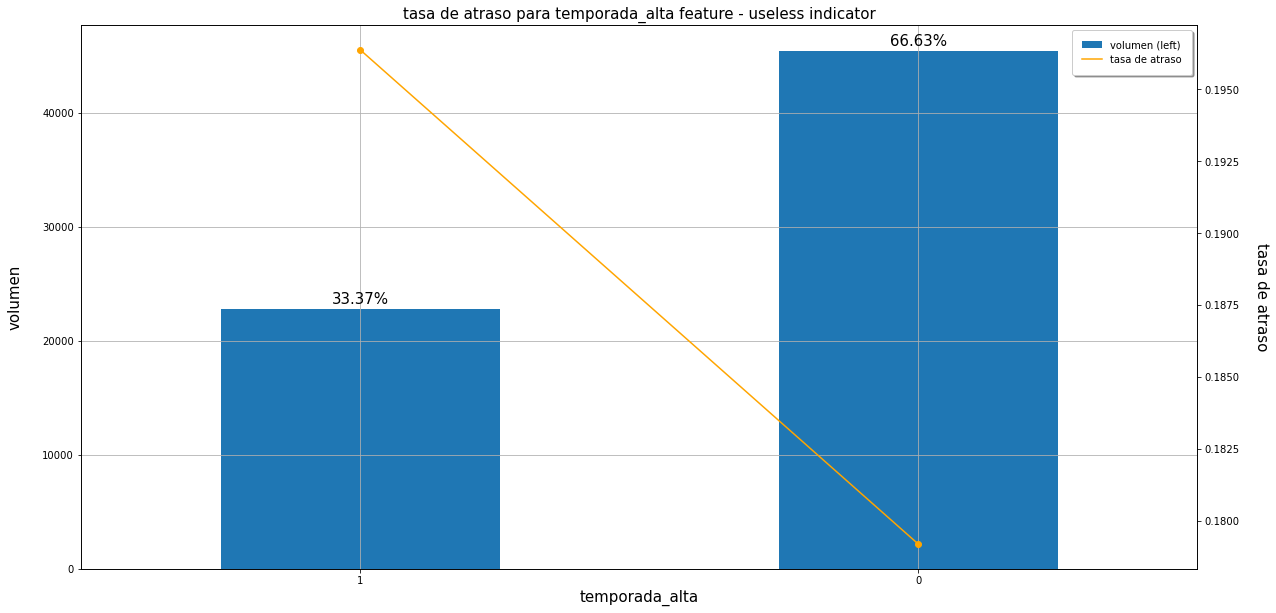

In [245]:
iv_df , iv = data_vars(df[['temporada_alta']],df['atraso_15']) 
plot_bivariant(iv_df, 'temporada_alta', 'temporada_alta')

Tal como era de esperar, los vuelos en temporada alta tienen una tasa de atraso mayor a los vuelos en temporada baja. Sin embargo, no es una diferencia significativa que separe de forma clara los vuelos con atraso de los que no.

### Tipo de vuelo

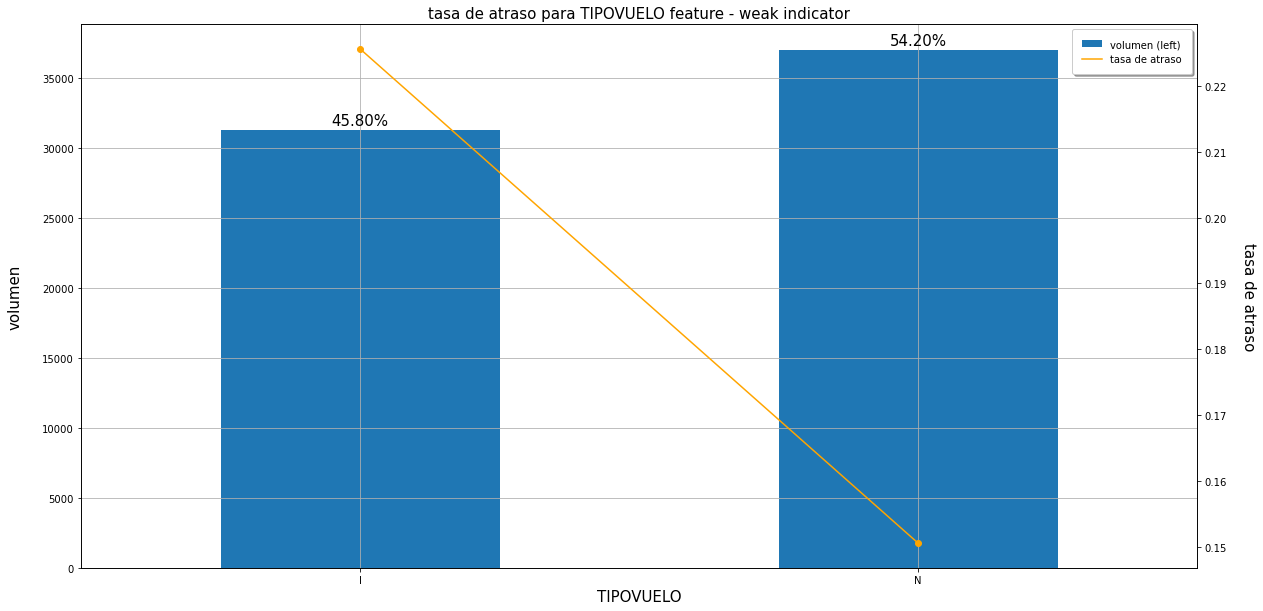

In [27]:
iv_df , iv = data_vars(df[['TIPOVUELO']],df['atraso_15']) 
plot_bivariant(iv_df, 'TIPOVUELO', 'TIPOVUELO')

Los vuelos internacionales tienen una tasa de atraso aproximadamente 7% mayor a los vuelos nacionales.
Tal como era de esperar, si partimos de la base que los vuelos internaciones requieren de controles aduaneros y protocolos mas estrictos de control.

### ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

Bajo la seccion EDA, en el apartado de cada variable, fuimos respondiendo como se distribuyen los datos, cosas que llaman la atencion y conclusiones (o hipotesis) que podriamos plantear

### Que variables se esperaria que influyeran mas en predecir los atrasos?

Segun todo lo comentado anteriormente en cada seccion, las variables que podrian tener mas potencia predictiva en los atrasos son:
- Destino. Probablemente sea por el flujo de pasajeros. Algunos destinos con mayor convocatoria que otros.
- Aerolinea. Aqui podemos plantear hipotesis como el formato de trabajo del staff para hacer el check-in y el on-boarding de sus pasajeros.
- Mes del año. Como dijomos antes, a partir de estos resultados, podriamos plantear la hipotesis de que esta estrictamente relacionado la tasa de atraso por mes con el flujo de pasajeros.


### Otras variables

#### Periodo_dia

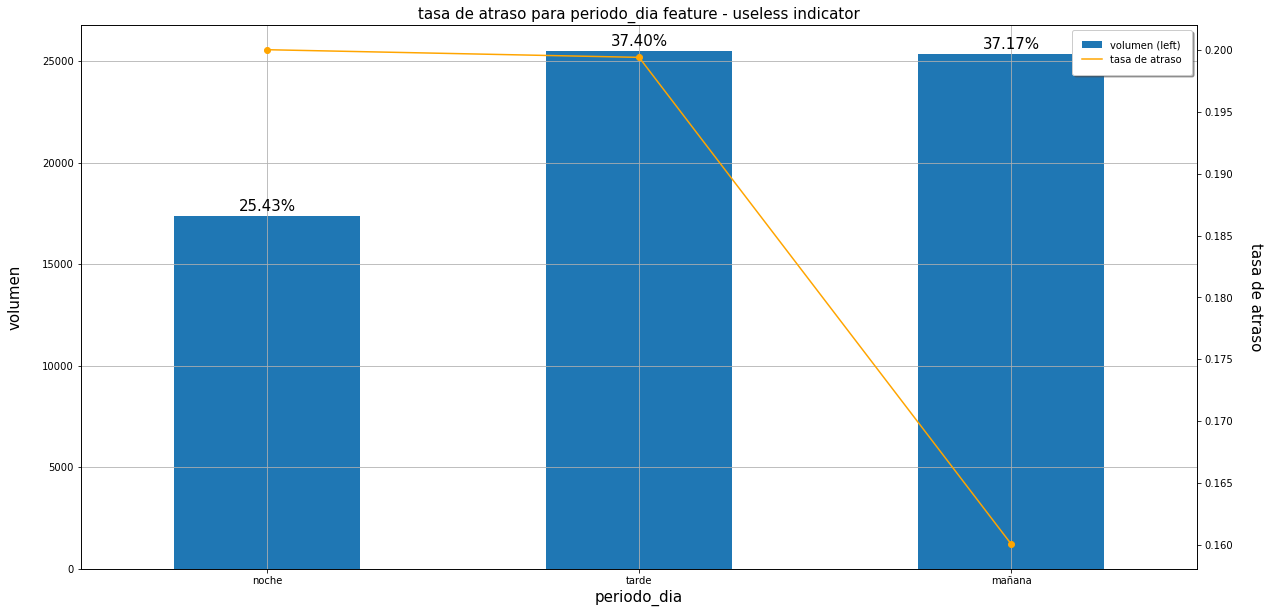

In [29]:
iv_df , iv = data_vars(df[['periodo_dia']],df['atraso_15']) 
plot_bivariant(iv_df, 'periodo_dia', 'periodo_dia')

La mañana y la tarde concentran la mayor cantidad de vuelos, sin embargo, la mañana es el periodo del dia que tiene menor tasa de atraso, aunque la diferencia no sea significativa como lo hemos visto en otras variables

#### Semana_del_año

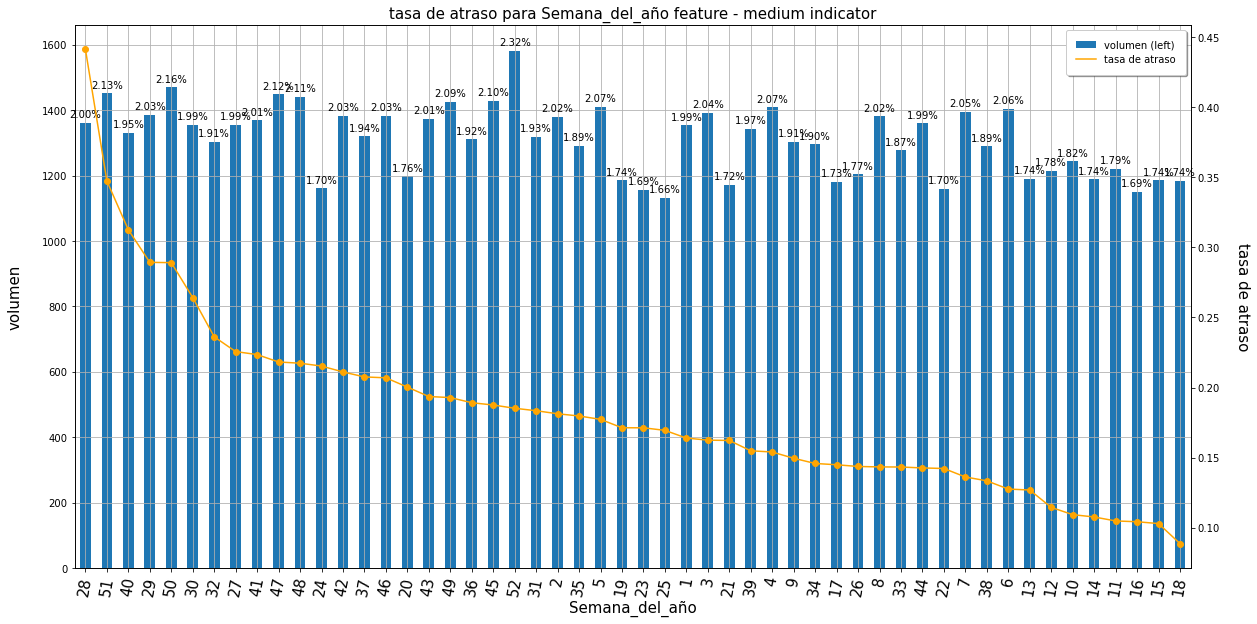

In [41]:
iv_df_Semana_del_año , iv = data_vars(df[['Semana_del_año']],df['atraso_15']) 
plot_bivariant(iv_df_Semana_del_año, 'Semana_del_año', 'Semana_del_año')

Podemos ver como las semanas 28, 29, 30, 40, 50 y 51 son las que tienen una mayor tasa de atraso.

La semana 28, 29 y 30 son las correspondientes a los lunes 10, 17 y 24 de Julio, respectivamente. Esas semanas son las que, segun el calendario escolar de Chile 2017 (https://www.ayudamineduc.cl/sites/default/files/cuadrocalendarioescolarregional2017.pdf) son las vacaciones de invierno. En algunas regiones las semanas 28 y 29, y en otras las 29 y 30.

La semana 40 es la del lunes 02-10 que termina con un fin de semana largo (09-10 Dia de la Raza en Chile).

Las semanas 50 y 51 son las dos semanas anteriores al comienzo de las fiestas.

Como tenemos 52 semanas en el año (por ende, alta cardinalidad en esta variable), vamos a buscar agrupar las semanas sin perder la informacion que nos brinda este primer analsis. Idealmente, buscaremos agrupar en orden decreciente de la tasa de atraso, con el objetivo de capturar en el segmento de tasa mas alta las semanas mencionadas anteriormente. 

Para esto, usarmeos la estrategia de los decilos que usamos en la variable de Destino.

In [42]:
iv_df_Semana_del_año['decile_semana'], bins = pd.qcut(iv_df_Semana_del_año['EVENT_RATE'], 
                                                      q=10,
                                                      retbins=True, 
                                                      labels = False
                                                     )
iv_df_Semana_del_año['decile_semana'] += 1

In [49]:
dict_ = {}
for week in iv_df_Semana_del_año['MIN_VALUE']:
    dict_[week] = iv_df_Semana_del_año[iv_df_Semana_del_año['MIN_VALUE'] == week]['decile_semana'].values

In [50]:
df['decile_semana'] = df['Semana_del_año'].map(dict_).str[0].astype('str')

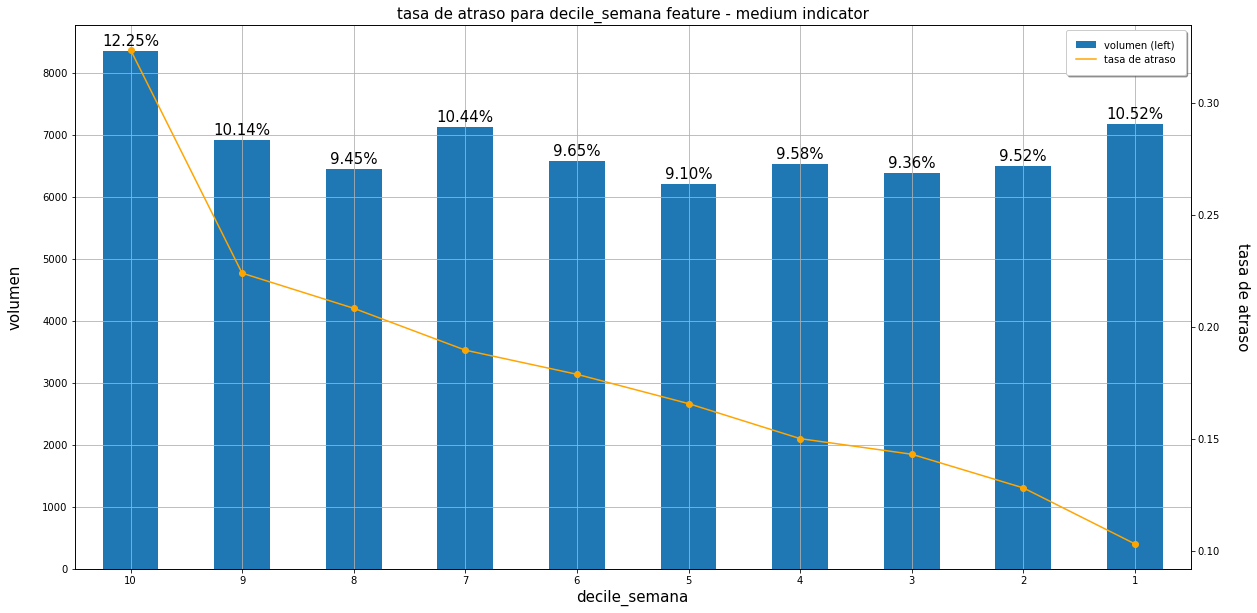

In [51]:
iv_df , iv = data_vars(df[['decile_semana']],df['atraso_15']) 
plot_bivariant(iv_df, 'decile_semana', 'decile_semana')

In [52]:
#Imprimmos las semanas del decilo 10
[k for k,v in dict_.items() if float(v) == 10]

['28', '29', '30', '40', '50', '51']

Podemos verificar que con la discretizacion en decilos, capturamos en el decilo 10 todas las semanaas antes mencioandas. Y ademas, con estas nuevas categorias, el IV sigue clasificando la variable con un poder predictivo "Medium", por lo que podriamos anticipar que no perdimos informacion relevante y logramos reducir la cardinalidad.

#### Cantidad de vuelos por hora

Bajo la seccion "Generacion de variables adicionales" habiamos creado esta variable.

Veamos ahora como se comporta su distirbucion y relacion con tasa de atraso.

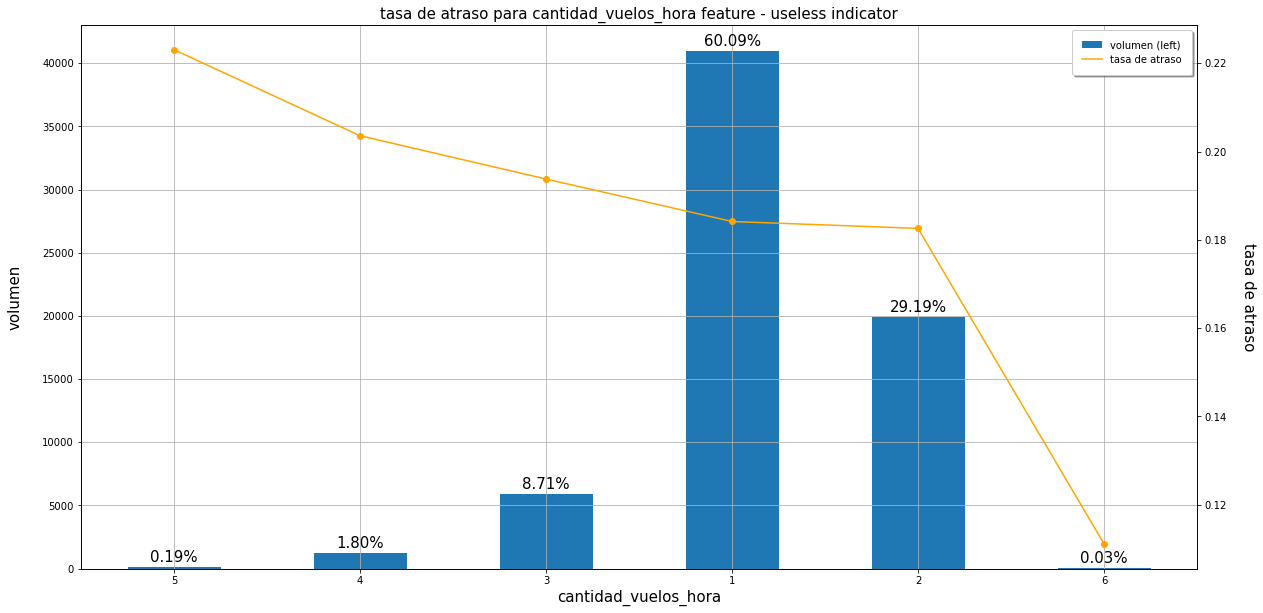

In [53]:
iv_df , iv = data_vars(df[['cantidad_vuelos_hora']],df['atraso_15']) 
plot_bivariant(iv_df, 'cantidad_vuelos_hora', 'cantidad_vuelos_hora')

Como es de esperar, el volumen de vuelos decrece a medida que aumenta la cantidad de vuelos en el mismo momento.

Por otro lado, vemos que no es una variable que linealmente pueda separar los vuelos con atrasos con una cierta claridad.
Sin embargo, la vamos a utilizar en nuestro modelo dado que aprori podria ser una variable importante.

Recordemos que el valor del IV es un buen indicador de la fuerza predictiva de una variable para algoritmos que descubren relaciones lineales.

## Model

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Fecha_I               68206 non-null  datetime64[ns]
 1   Vlo_I                 68206 non-null  object        
 2   Ori_I                 68206 non-null  object        
 3   Des_I                 68206 non-null  object        
 4   Emp_I                 68206 non-null  object        
 5   Fecha_O               68206 non-null  datetime64[ns]
 6   Vlo_O                 68205 non-null  object        
 7   Ori_O                 68206 non-null  object        
 8   Des_O                 68206 non-null  object        
 9   Emp_O                 68206 non-null  object        
 10  DIA                   68206 non-null  object        
 11  MES                   68206 non-null  object        
 12  AÑO                   68206 non-null  object        
 13  DIANOM          

Debemos realizar una correccion mas: 
- la variable 'cantidad_vuelos_hora' la debemos convertir a numerica.

In [117]:
df.columns

Index(['Fecha_I', 'Vlo_I', 'Ori_I', 'Des_I', 'Emp_I', 'Fecha_O', 'Vlo_O',
       'Ori_O', 'Des_O', 'Emp_O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'dif_min', 'atraso_15', 'periodo_dia',
       'temporada_alta', 'Semana_del_año', 'cantidad_vuelos_hora'],
      dtype='object')

Vamos a eliminar todas las columnas que no utilizaremos para el modelado.

In [65]:
df_model = (df.drop(['Fecha_I'
                     ,'Vlo_I',
                     'Ori_I',
                     'Des_I',
                     'Fecha_O',
                     'Vlo_O',
                     'Ori_O', 
                     'Des_O', 
                     'Emp_O', 
                     'DIA',
                     'AÑO',
                     'OPERA', 
                     'SIGLAORI',
                     'SIGLADES',
                     'dif_min',
                     #'atraso_15',
                    'Semana_del_año'], 
                   axis=1
                  )
            .assign(cantidad_vuelos_hora = df.cantidad_vuelos_hora.astype(int) 
                   )
           )

In [59]:
target = 'atraso_15'

In [66]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Emp_I                 68206 non-null  object
 1   MES                   68206 non-null  object
 2   DIANOM                68206 non-null  object
 3   TIPOVUELO             68206 non-null  object
 4   temporada_alta        68206 non-null  int32 
 5   atraso_15             68206 non-null  int32 
 6   periodo_dia           68206 non-null  object
 7   cantidad_vuelos_hora  68206 non-null  int32 
 8   decile_destino        68206 non-null  object
 9   decile_semana         68206 non-null  object
dtypes: int32(3), object(7)
memory usage: 4.4+ MB


In [26]:
#features_to_model = ['Des_I','Emp_I','DIANOM','MES','TIPOVUELO','retraso']

In [27]:
#df_model = df[features_to_model]

In [69]:
#Usamos el parametro drop_first para obtener k-1 categorias de una variable con k categorias
df_model_final = pd.get_dummies(df_model, drop_first = True )

In [70]:
df_model_final.head()

,temporada_alta,atraso_15,cantidad_vuelos_hora,Emp_I_ACA,Emp_I_AFR,Emp_I_AMX,Emp_I_ARG,Emp_I_AUT,Emp_I_AVA,Emp_I_AZA,...,decile_destino_9,decile_semana_10,decile_semana_2,decile_semana_3,decile_semana_4,decile_semana_5,decile_semana_6,decile_semana_7,decile_semana_8,decile_semana_9
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [74]:
X_train, X_test, y_train, y_test = train_test_split(df_model_final.drop(['atraso_15'],axis=1),
                                                df_model_final['atraso_15'],
                                                test_size = 0.2,
                                                random_state = 42,
                                                stratify=df_model_final['atraso_15'] #due to imbalanced data
                                               )

### Metricas

Como metricas vamos a utilizar el area bajo la curva ROC (AUC de la curva ROC) dado que nuestro objetivo es predecir probabilidade y con esta metrica, no damos el paso de setear un threshold para determinar a partir de que probabilidad una clase se convierte en 1 o en 0, podemos trabajar con probabilidades en vez de asignaciones finales.

Sera nuestra metrica de comparacion para seleccionar el mejor modelo.

Adicionalmnente, vamos a comparar Recall. En este caso nos interesa Recall (en vez de Precision) dado que queremos capturar todos los vuelos que se atrasan, es decir, vamos a ponderar con mayor magnitud el hecho de decir que un vuelo no se atrasa, pero finalmente se termine atrasando. No le damos tanta importancia al caso de predecir atrasos cuando en realidad estos no sucedan.

### XGBoost

In [90]:
XGB= XGBClassifier()
XGB.fit(X_train, y_train)


# evaluate model
scores_XGB = cross_val_score(XGB, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores))

# summarize performance in test
pred_probabilities = XGB.predict_proba(X_test)[:, 1]
AUC_test_XGB = roc_auc_score(y_test, pred_probabilities)
recall_test_XGB = recall_score(y_test, XGB.predict(X_test), average='binary')

print('ROC AUC in test: %.5f' % AUC_test_XGB)
print('Recall in test: %.5f' % recall_test_XGB)

Mean ROC AUC in train: 0.71930
ROC AUC in test: 0.72291
Recall in test: 0.14269


### AdaBoost

In [95]:
from sklearn.ensemble import AdaBoostClassifier
AdaBoostclf = AdaBoostClassifier()
AdaBoostclf.fit(X_train, y_train)


# evaluate model
scores_AdaBoost = cross_val_score(AdaBoostclf, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores_AdaBoost))

# summarize performance in test
pred_probabilities = AdaBoostclf.predict_proba(X_test)[:, 1]
AUC_test_AdaBoost = roc_auc_score(y_test, pred_probabilities)
recall_test_AdaBoost = recall_score(y_test, AdaBoostclf.predict(X_test), average='binary')
print('ROC AUC in test: %.5f' % AUC_test_AdaBoost)
print('Recall in test: %.5f' % recall_test_AdaBoost)

Mean ROC AUC in train: 0.68389
ROC AUC in test: 0.68029
Recall in test: 0.04677


### Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)


# evaluate model
scores_RF = cross_val_score(RF, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores_RF))

# summarize performance in test
pred_probabilities = RF.predict_proba(X_test)[:, 1]
AUC_test_RF = roc_auc_score(y_test, pred_probabilities)
recall_test_RF = recall_score(y_test, RF.predict(X_test), average='binary')
print('ROC AUC in test: %.5f' % AUC_test_RF)
print('Recall in test: %.5f' % recall_test_RF)

Mean ROC AUC in train: 0.66039
ROC AUC in test: 0.66659
Recall in test: 0.22315


### Neural Network

In [97]:
import tensorflow as tf
import keras

In [156]:
#Creamos una MLP con 300 neuronas y DropOut a la salida de esta capa
# Y seteamos Early Stopping con una paciencia dde 3
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model_NN = keras.Sequential([
    keras.layers.Dense(300, activation='relu', input_shape=(X_train.shape[-1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1, activation='sigmoid'),
])

model_NN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300)               21000     
                                                                 
 batch_normalization_4 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 301       
                                                                 
Total params: 22,501
Trainable params: 21,901
Non-trainable params: 600
_________________________________________________________________


In [157]:
model_NN.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.Recall()])

In [158]:
history = model_NN.fit(
    X_train,
    y_train, 
    validation_data=(X_test, y_test),
    batch_size=2048, 
    epochs=100,
    callbacks=[callback]
)

Epoch 1/100
27/27 [==============================] - 4s 69ms/step - loss: 0.7459 - auc_4: 0.5716 - recall_3: 0.4915 - val_loss: 0.5823 - val_auc_4: 0.6540 - val_recall_3: 0.0075
Epoch 2/100
27/27 [==============================] - 1s 42ms/step - loss: 0.5806 - auc_4: 0.6194 - recall_3: 0.3649 - val_loss: 0.5113 - val_auc_4: 0.6691 - val_recall_3: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 1s 42ms/step - loss: 0.5150 - auc_4: 0.6330 - recall_3: 0.2539 - val_loss: 0.4771 - val_auc_4: 0.6846 - val_recall_3: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 1s 41ms/step - loss: 0.4818 - auc_4: 0.6507 - recall_3: 0.2033 - val_loss: 0.4653 - val_auc_4: 0.6890 - val_recall_3: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 1s 43ms/step - loss: 0.4615 - auc_4: 0.6723 - recall_3: 0.1687 - val_loss: 0.4619 - val_auc_4: 0.6932 - val_recall_3: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 1s 41ms/step - loss: 0.4532 - auc_4: 0.68

In [159]:
train_performance = model_NN.evaluate(X_train, y_train)
test_performance = model_NN.evaluate(X_test, y_test)

427/427 [==============================] - 1s 2ms/step - loss: 0.4322 - auc_4: 0.7183 - recall_3: 0.1233


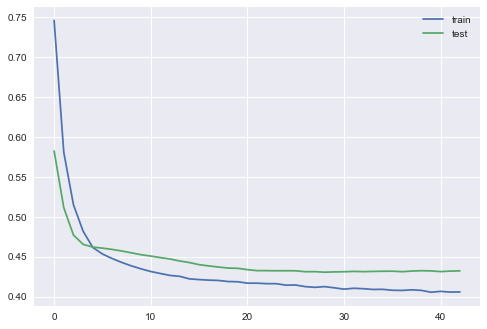

In [161]:
# Graficamamos  Loss durante el entrenamiento
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

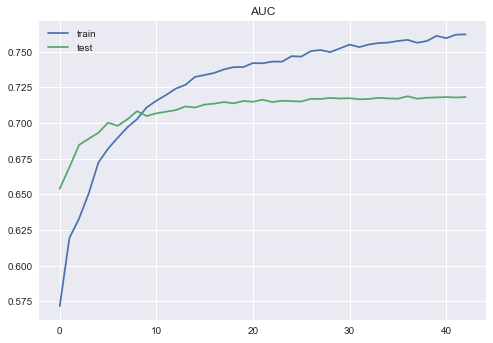

In [164]:
# Graficamamos  AUC durante el entrenamiento
plt.title('AUC')
plt.plot(history.history['auc_4'], label='train')
plt.plot(history.history['val_auc_4'], label='test')
plt.legend()

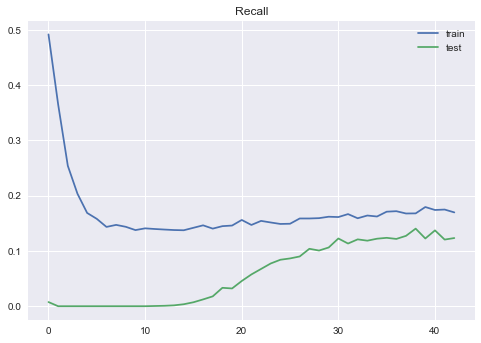

In [165]:
# Graficamamos  Recall durante el entrenamiento
plt.title('Recall')
plt.plot(history.history['recall_3'], label='train')
plt.plot(history.history['val_recall_3'], label='test')
plt.legend()

Las tres metricas parecen converger a un valor constante, por lo que consideramos que el Early Stopping seteado se ajusta a lo que buscamos

## Comparacion entre modelos

In [166]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, XGB.predict_proba(X_test)[:, 1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, AdaBoostclf.predict_proba(X_test)[:, 1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, RF.predict_proba(X_test)[:, 1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_NN.predict(X_test).ravel())

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

427/427 [==============================] - 1s 2ms/step


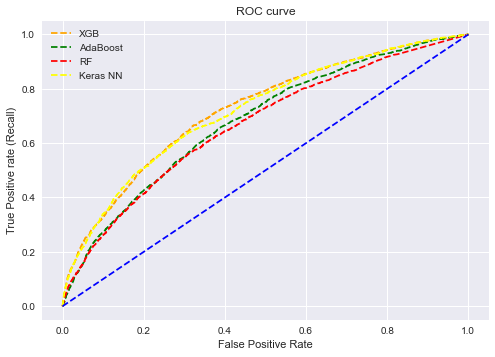

In [167]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGB')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='AdaBoost')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='RF')
plt.plot(fpr4, tpr4, linestyle='--',color='yellow', label='Keras NN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate (Recall)')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

El modelo que tiene la mejor performance es XGBoost. Podriamos seleccionar la MLP, pero si consideramos que tiene un AUC de la curva ROC levemente menor, y que estamos entrenando 21901 parametros (modelo bastante mas complejo que XGBoost) es que descartamos esta opcion.

### Importance feature

<Figure size 1440x1440 with 0 Axes>

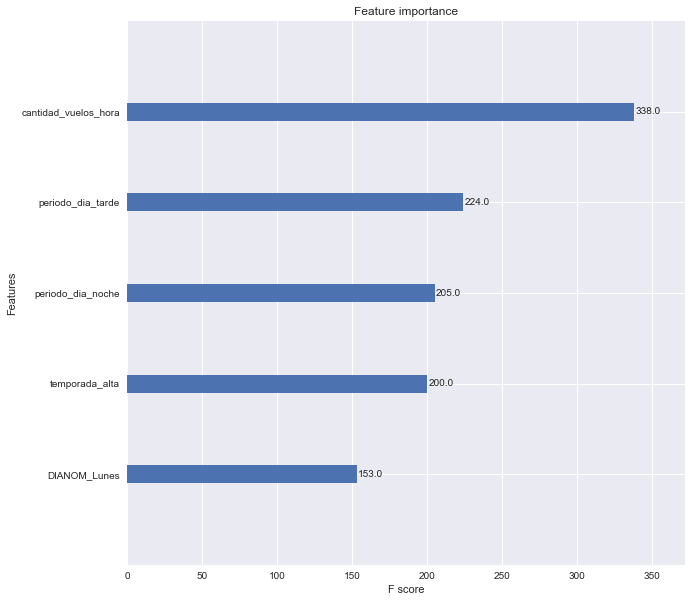

In [182]:
from xgboost import plot_importance
plt.figure(figsize=(20,20))
plot_importance(XGB, max_num_features =5)
plt.show()

Las features que tienen mayor influencia en la prediccion segun el modelo de mejor perfomance (XGBoost) son:
- Cantidad de vuelos a la misma hora
- Periodo del dia: tarde
- Periodo del dia: noche
- Temporada alta
- Dia Lunes de la semana

### Como podriamos mejorar la performance?

Agregar variables externas como:
- Los dias en que la Aduana esta cerrrada o con paros laborales. Planteo la hipotesis de que en estos dias podrian tener una alta tasa de atraso
- Climatologia: Evidentemente esta variable podria tener una fuerza predictora grande a los efectos de predecir atrasos en los vuelos
- Flujo de pasajeros: Cantidad de pasajeros que circulan en el aeropuerto por dia, y naturalmente, tambien por vuelo. 

Relativo concretamente a la performance del modelo:
- Realizar Randomized Search (lo haremos en la siguiente seccion) o Grid Search para hacer tuning en los hiperparametros
- Aplicar regularizacion


### Tuning de Hiper parametros: Randomized Search CV

In [183]:
from sklearn.model_selection import RandomizedSearchCV

In [184]:
xgb_cl_tuning = XGBClassifier()

In [185]:
params = {
 "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [187]:
rs_XGB = RandomizedSearchCV(xgb_cl_tuning,
                              param_distributions=params,
                              n_iter=5,
                              scoring='roc_auc',
                              n_jobs=-1,
                              cv=5,
                              verbose=3
                             )

In [188]:
rs_XGB.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=Non

In [190]:
rs_XGB.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [191]:
XGB_tuning= XGBClassifier(colsample_bytree=0.5,
                          gamma=0.3, 
                          learning_rate=0.2, 
                          max_depth=12,
                          min_child_weight=7
                         )

In [192]:
XGB_tuning.fit(X_train, y_train)

# evaluate model
scores_XGB_tuning = cross_val_score(XGB_tuning, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)
# summarize performance in train
print('Mean ROC AUC in train: %.5f' % np.mean(scores_XGB_tuning))

# summarize performance in test
pred_probabilities = XGB_tuning.predict_proba(X_test)[:, 1]
AUC_test_XGB_tuning = roc_auc_score(y_test, pred_probabilities)
recall_test_XGB_tuning = recall_score(y_test, XGB_tuning.predict(X_test), average='binary')

print('ROC AUC in test: %.5f' % AUC_test_XGB_tuning)
print('Recall in test: %.5f' % recall_test_XGB_tuning)

Mean ROC AUC in train: 0.72067
ROC AUC in test: 0.72549
Recall in test: 0.15656


En el XGB sin tuning habiamos obtenido estos resultados:
- Mean ROC AUC in train: 0.71930
- ROC AUC in test: 0.72291
- Recall in test: 0.14269

Por lo que con este tuning de hiper paraemetros vemos una mejoria (leve) pero mejoria en fin.
Podriamos mejorar aun mas la performance del modelo haciendo Grid Search en torno a los resultados que obtuvimos con Randomized Search.